In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datfile = "C:/Users/jo2zh/Documents/Thinkful/HTRU_2.csv"
df = pd.read_csv(datfile, header=None,names=["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness","Class"])

In [3]:
df.head()

,Mean,SD,Excess Kurtosis,Skewness,DM Mean,DM SD,DM Excess Kurtosis,DM Skewness,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
Mean                  17898 non-null float64
SD                    17898 non-null float64
Excess Kurtosis       17898 non-null float64
Skewness              17898 non-null float64
DM Mean               17898 non-null float64
DM SD                 17898 non-null float64
DM Excess Kurtosis    17898 non-null float64
DM Skewness           17898 non-null float64
Class                 17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
#Check for missing values
df.isnull().sum()*100/df.isnull().count()

Mean                  0.0
SD                    0.0
Excess Kurtosis       0.0
Skewness              0.0
DM Mean               0.0
DM SD                 0.0
DM Excess Kurtosis    0.0
DM Skewness           0.0
Class                 0.0
dtype: float64

C:\Users\jo2zh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


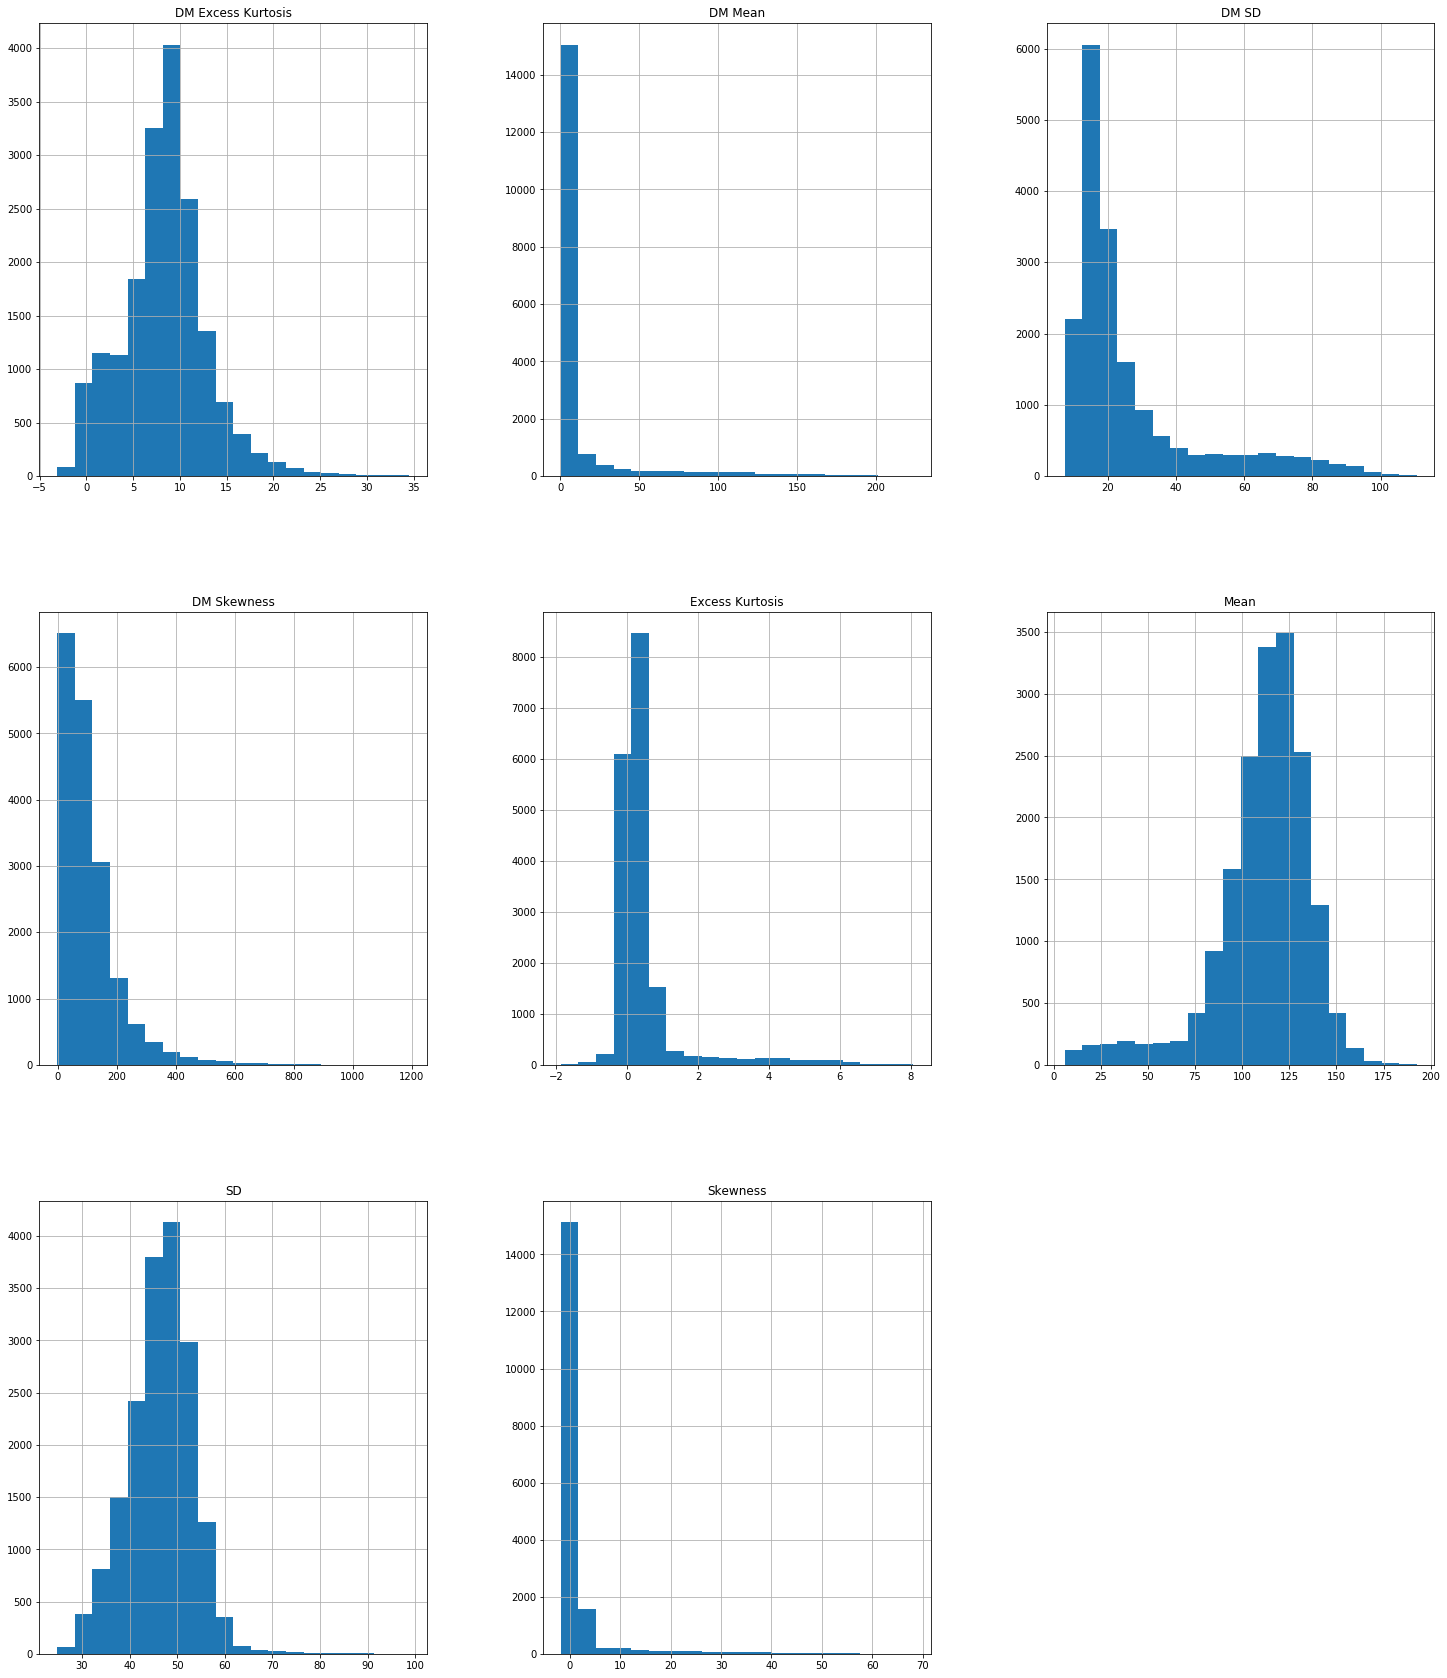

In [39]:
fig = plt.figure(figsize = (25,30)) 
ax = fig.gca() 
hist = df[["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"]].hist(bins=20,ax=ax)

Histograms indicate a lot of the variables could use some transforms before use in models. 

In [48]:
#Scaling the dataset for better visualization. Will rescale later when splitting to prevent data leakage

from sklearn.preprocessing import StandardScaler
df2=StandardScaler().fit_transform(df[["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"]])
df2 =pd.DataFrame(df2, columns=["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"])

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

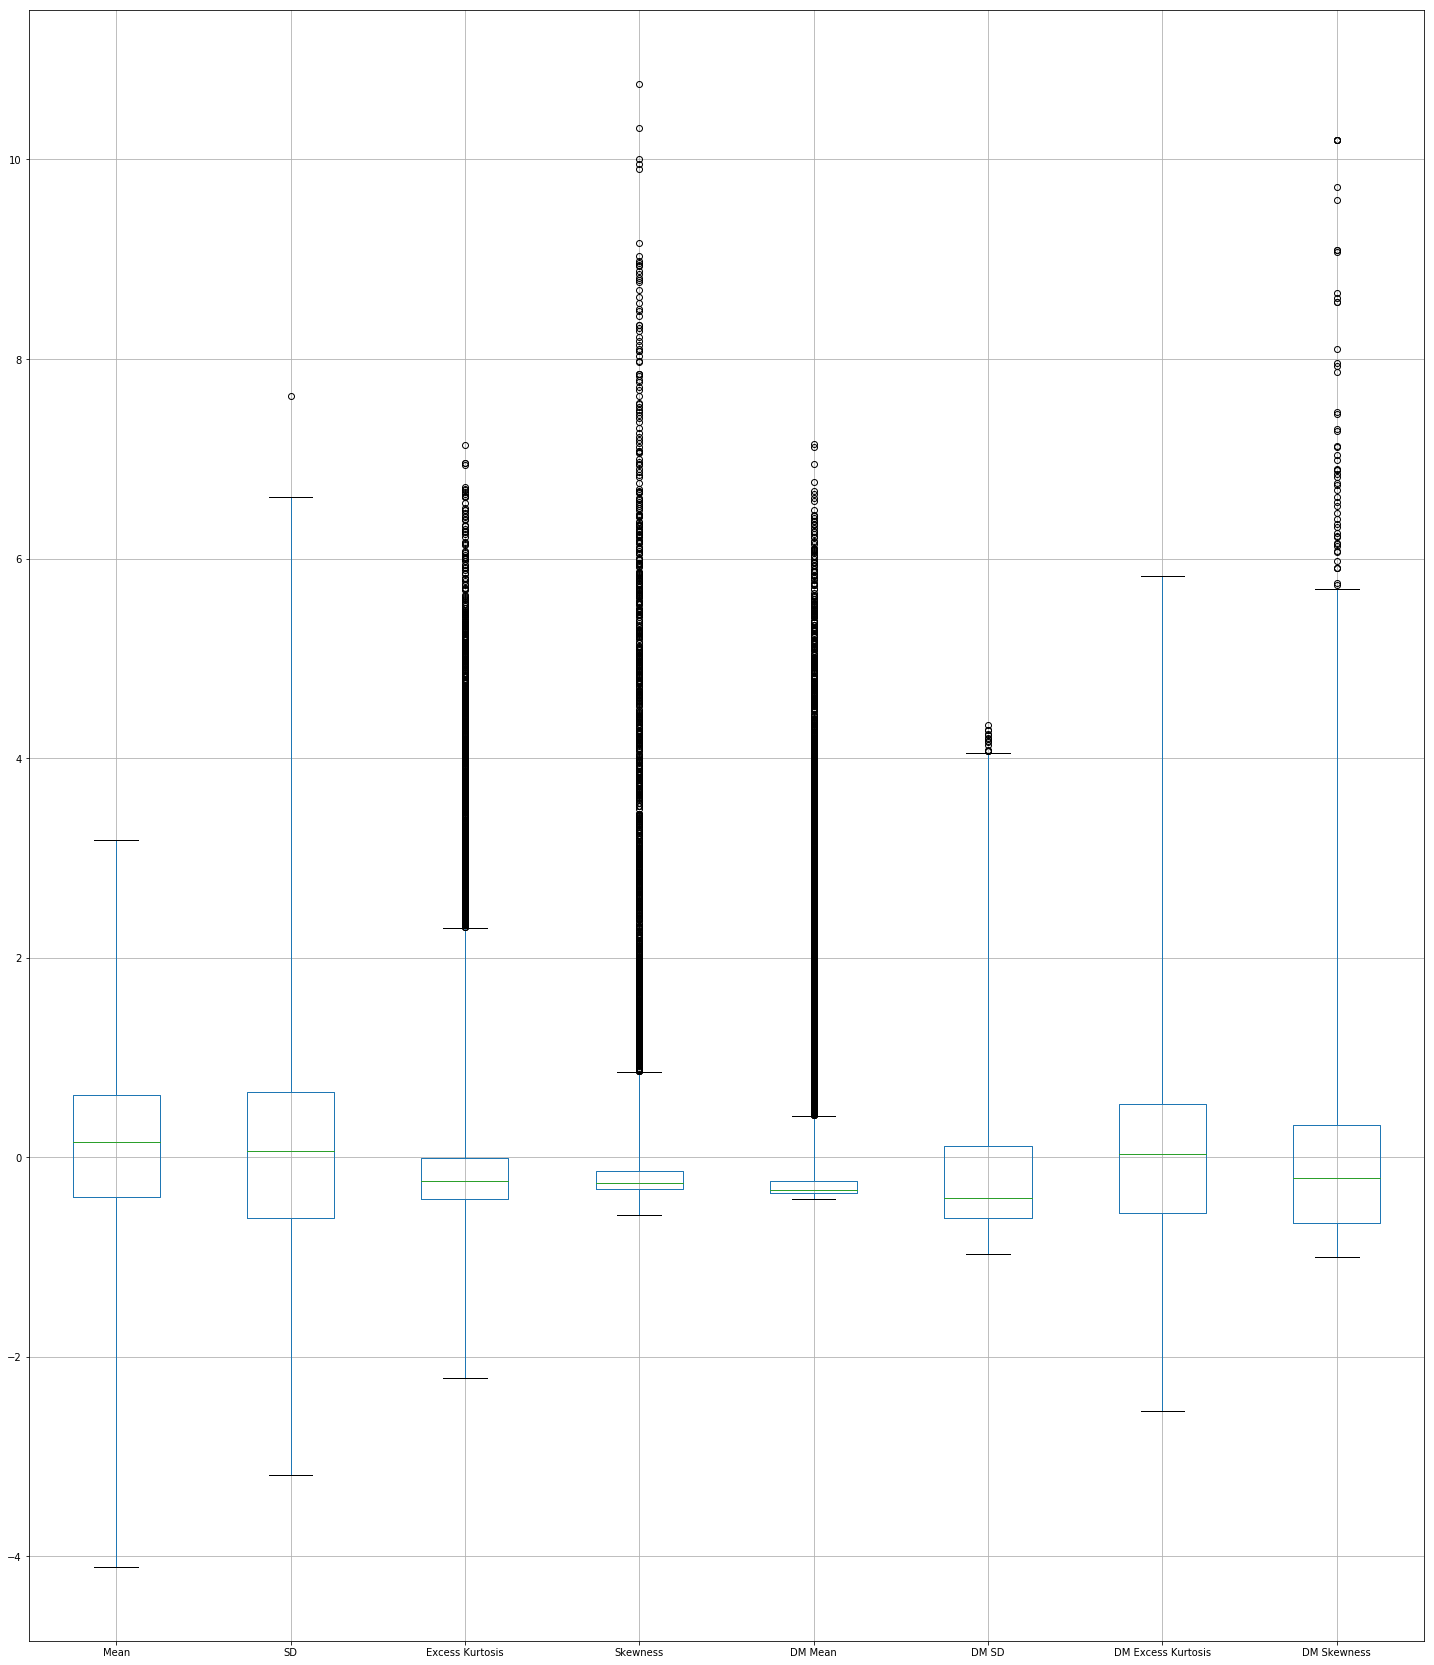

In [57]:
fig = plt.figure(figsize = (25,30)) 

bxplt = df2[["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"]].boxplot(whis=5.5)
#Try histogram and increasing boxplot std Dev to above 1.5

Baseline prediction rate is 90.84%, since the dataset has:
17898 total entries
1639 positive
16259 negative

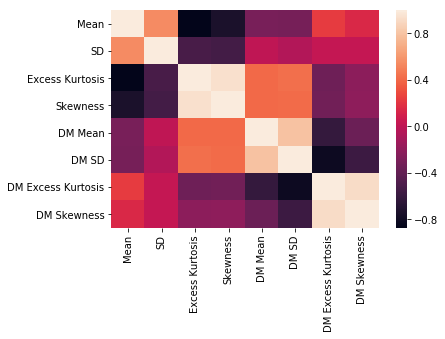

In [4]:
sns.heatmap(df[["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"]].corr())

Naive Bayes and Logistic Regression can be used as the most simple means of binary classification in this instance. First we split the data into train and test sets.

In [3]:
#Splitting into Train and Test Data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df[["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"]], df['Class'], test_size=0.4, random_state=0)

In [38]:
#Histograms show non-normal distributions of the variables. Standardize and apply quantile tranform (Yeo-Johnson also possible, Box-Cox is not due to negative values)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

scaler = StandardScaler()
quant = QuantileTransformer(output_distribution='normal', random_state=0)
yj = PowerTransformer(standardize=False)

xtr=quant.fit_transform(xtrain)
xtr=scaler.fit_transform(xtr)
xtr=pd.DataFrame(xtr, columns=["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"])
xt=quant.fit_transform(xtest)
xt=scaler.fit_transform(xt)
xt=pd.DataFrame(xt, columns=["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"])

xtr2=yj.fit_transform(xtrain)
xtr2=scaler.fit_transform(xtr2)
xtr2=pd.DataFrame(xtr2, columns=["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"])
xt2=yj.fit_transform(xtest)
xt2=scaler.fit_transform(xt)
xt2=pd.DataFrame(xt2, columns=["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"])

C:\Users\jo2zh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


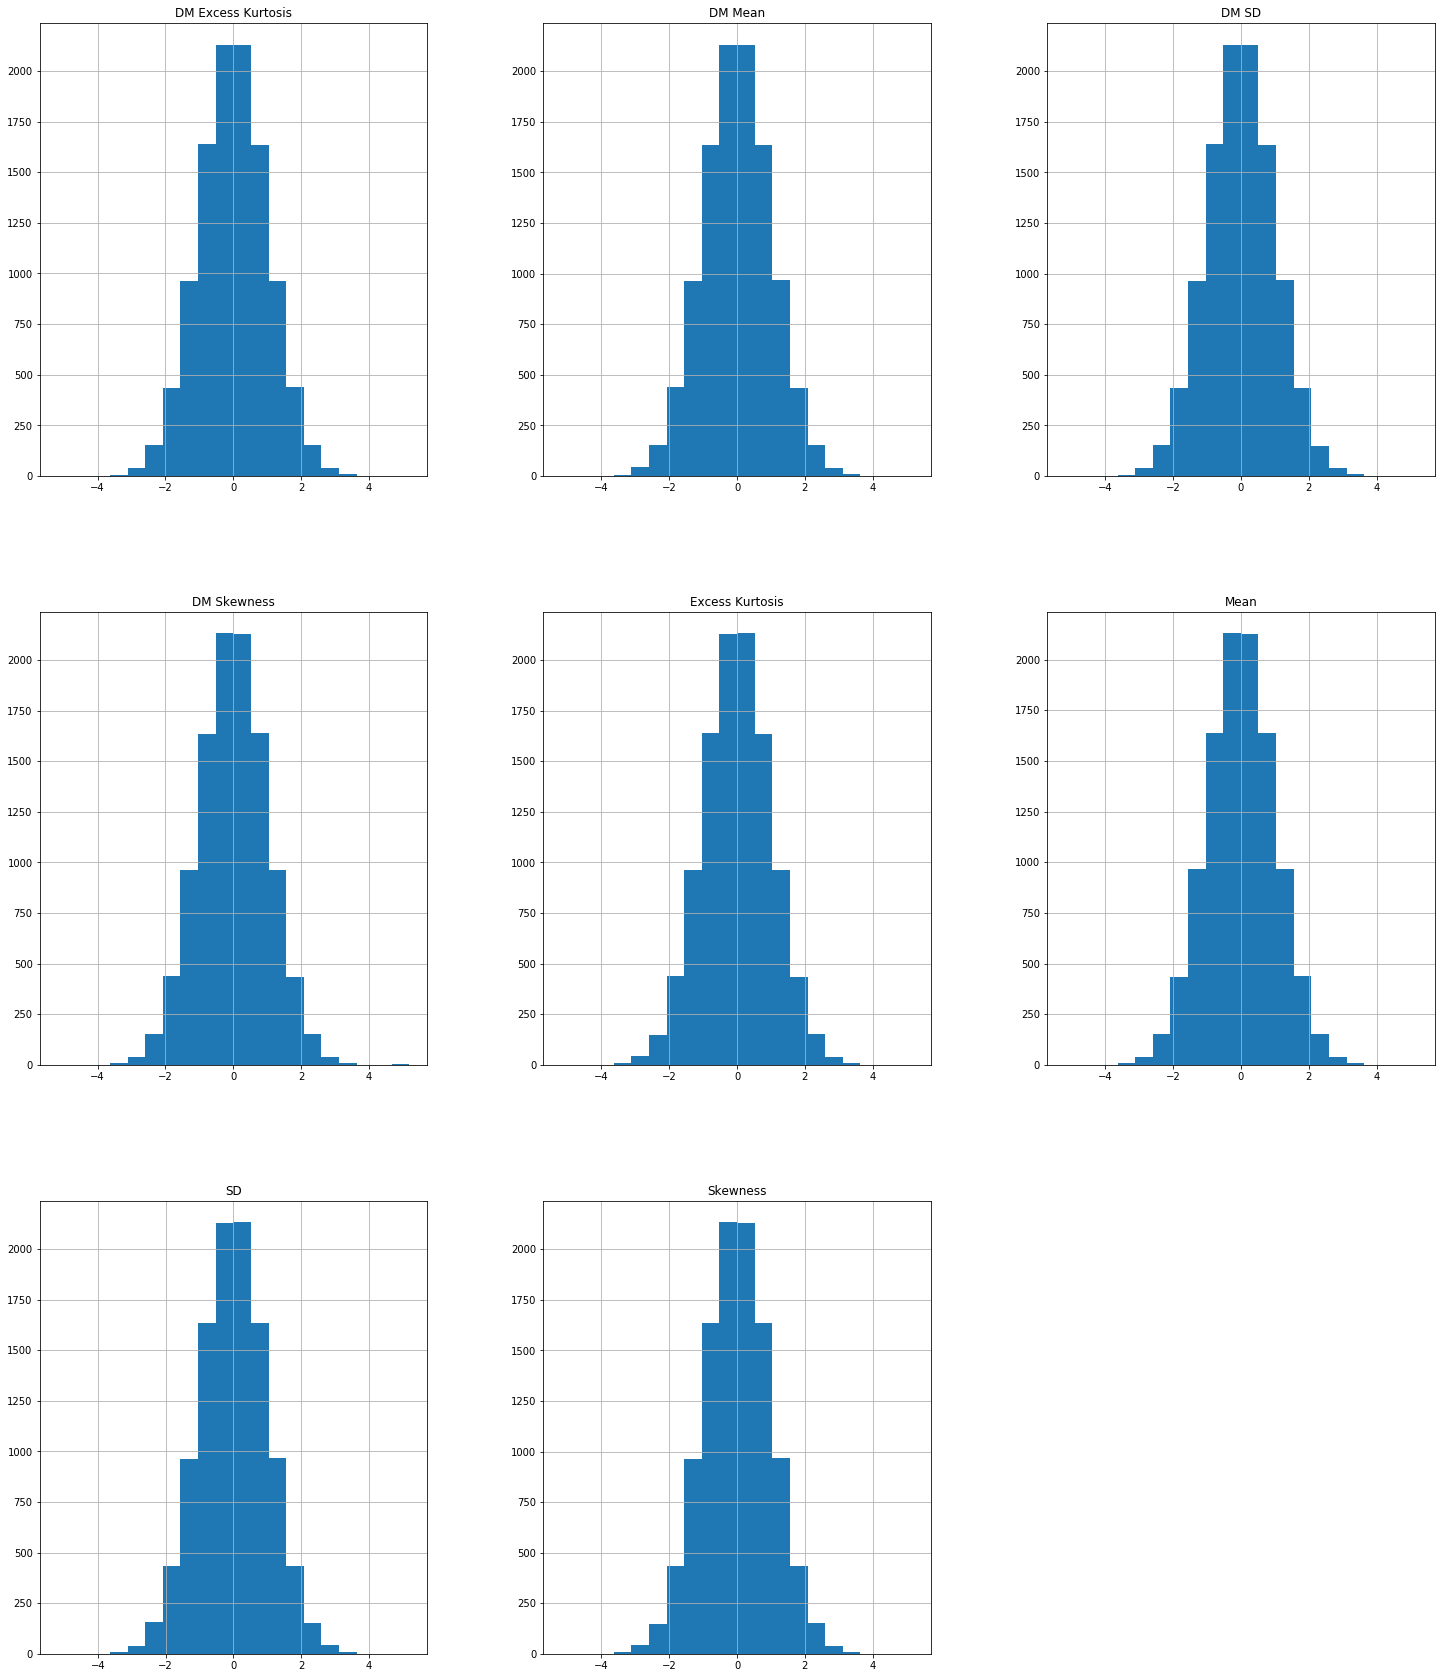

In [39]:
fig = plt.figure(figsize = (25,30)) 
ax = fig.gca() 
hist = xtr[["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"]].hist(bins=20,ax=ax)

C:\Users\jo2zh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


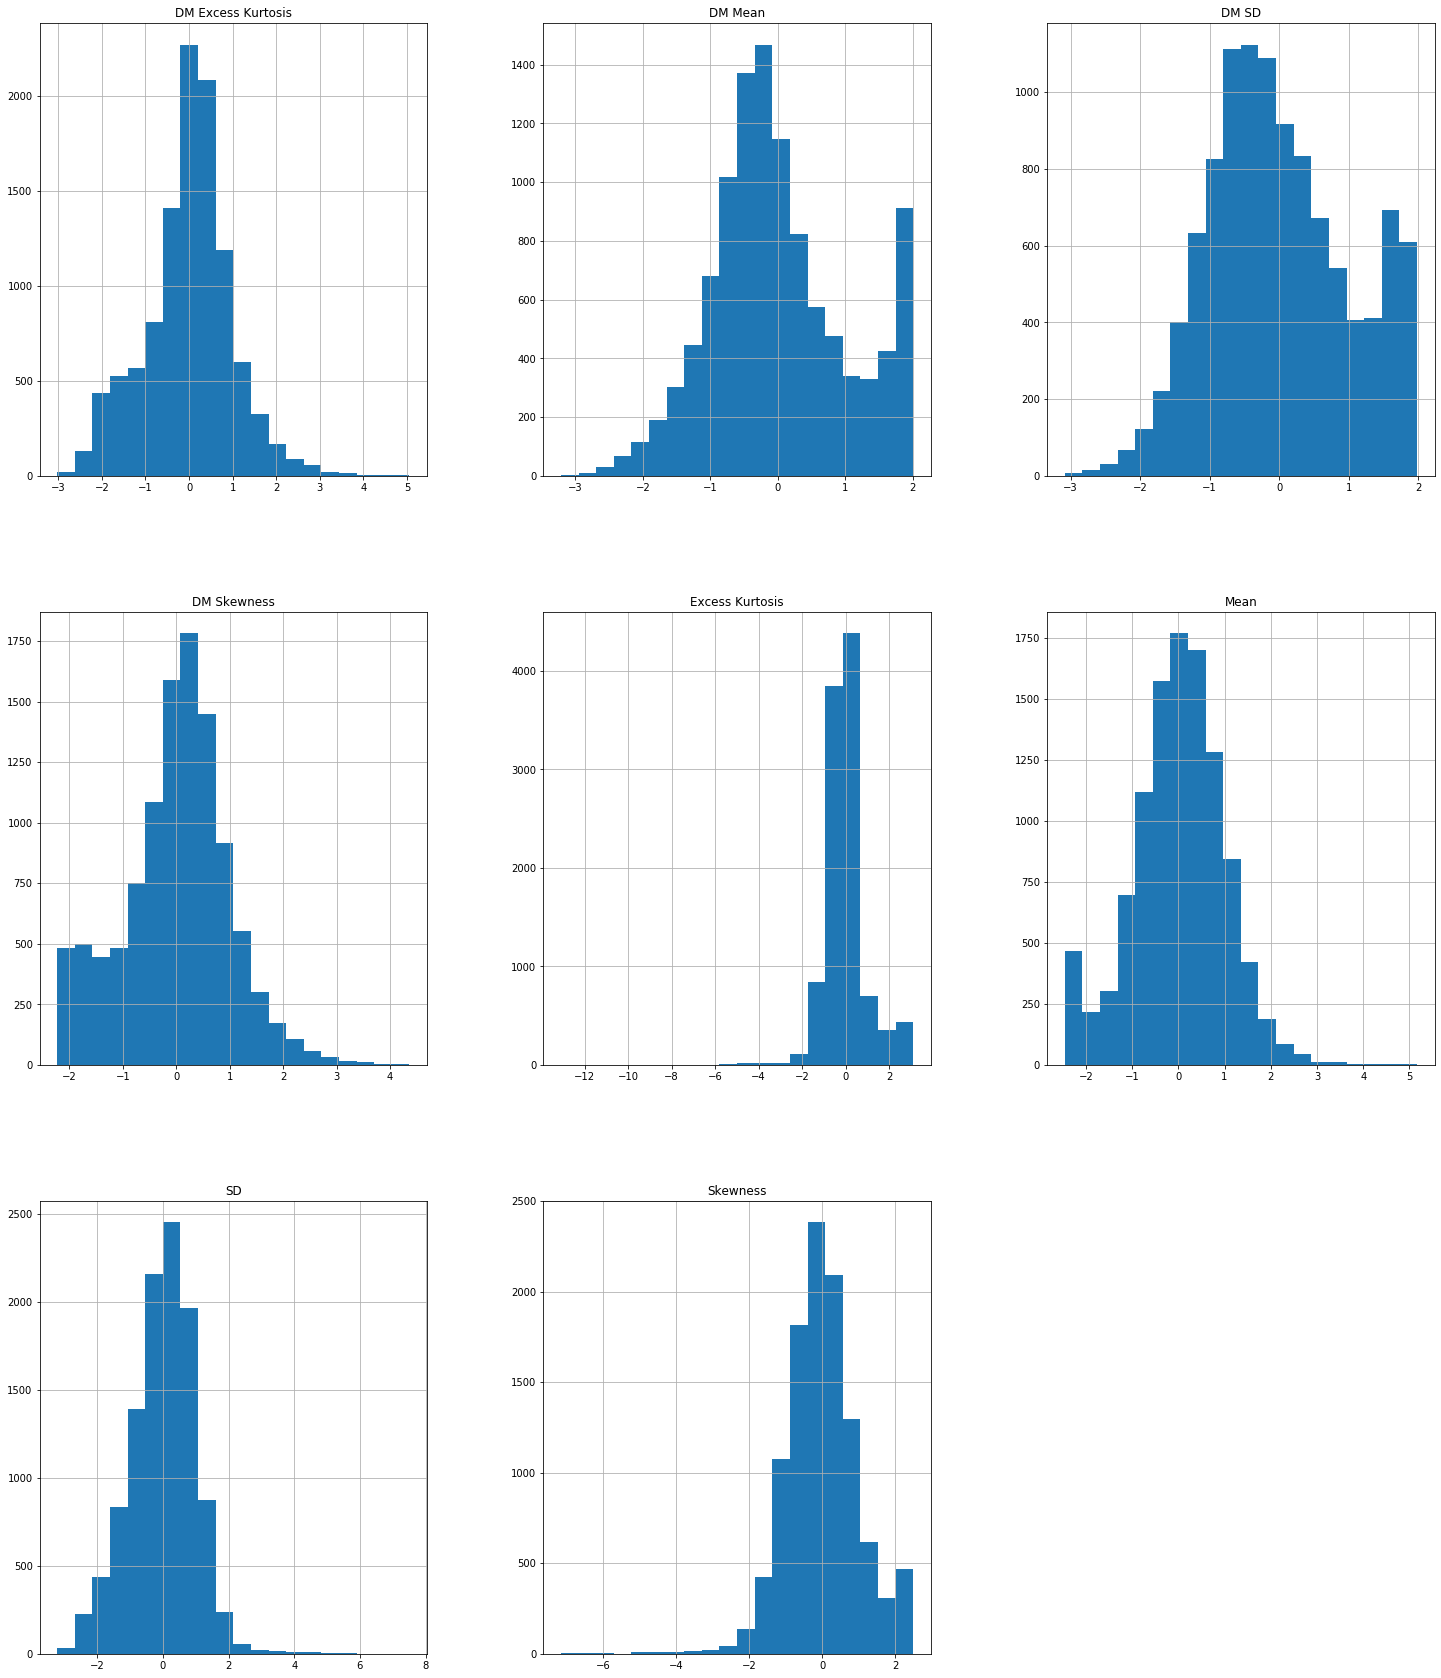

In [40]:
fig = plt.figure(figsize = (25,30)) 
ax = fig.gca() 
hist = xtr2[["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"]].hist(bins=20,ax=ax)

In [28]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(xtr, ytrain)

y_pred = bnb.predict(xt)

print(bnb.score(xt,ytest))
cross_val_score(bnb, xtr,ytrain,cv=10)

0.8956703910614525


array([0.88372093, 0.89860465, 0.89581395, 0.89292365, 0.90223464,
       0.90214352, 0.88909599, 0.90680336, 0.89095993, 0.90214352])

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, xtr, ytrain, cv=10)

array([0.88372093, 0.89860465, 0.89581395, 0.89292365, 0.90223464,
       0.90214352, 0.88909599, 0.90680336, 0.89095993, 0.90214352])

In [15]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(xtr, ytrain)
pred = logreg.predict(xt)
print(logreg.score(xt,ytest))
cross_val_score(logreg, xtr, ytrain, cv=10)

0.9782122905027933


array([0.97488372, 0.98883721, 0.97860465, 0.97579143, 0.98696462,
       0.97763281, 0.97110904, 0.97949674, 0.97576887, 0.97390494])

In [17]:
#KNN Model 
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=6)
neighbors.fit(xtr,ytrain)
kpred = neighbors.predict(xt)
print(neighbors.score(xt, ytest))
cross_val_score(neighbors, xtr, ytrain, cv=10)

0.9783519553072626


array([0.97488372, 0.98325581, 0.97395349, 0.97206704, 0.98324022,
       0.97483691, 0.96551724, 0.97856477, 0.97763281, 0.97297297])

In [18]:
#Random Forest Model
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(xtr, ytrain)
rfpred = rfc.predict(xt)
print(rfc.score(xt,ytest))
cross_val_score(rfc, xtr, ytrain, cv=10)

0.9763966480446927


array([0.98046512, 0.98883721, 0.98046512, 0.97299814, 0.98230912,
       0.97483691, 0.97204101, 0.97856477, 0.98136067, 0.97390494])

In [19]:
#SVM Model
from sklearn import svm
svc = svm.SVC(gamma='scale', kernel='linear', C=10, class_weight='balanced')
svc.fit(xtr,ytrain)
print(svc.score(xt,ytest))
cross_val_score(svc, xtr,ytrain, cv=10)


0.9502793296089386


array([0.95162791, 0.94976744, 0.9572093 , 0.96275605, 0.96089385,
       0.95992544, 0.94967381, 0.96831314, 0.95806151, 0.94780988])

In [29]:
ytrain.dtype

dtype('int64')

In [26]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
parameters = {'kernel':('linear','poly','rbf','sigmoid'), 'C':[1,10]}
svc = svm.SVC(gamma="scale")
search = RandomizedSearchCV(svc, parameters, cv=5)
search.fit(xtr,ytrain)
from sklearn.model_selection import cross_val_score
cross_val_score(svc, xtr,ytrain, cv=10)
print(clf.best_params_)

C:\Users\jo2zh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'kernel': 'linear', 'C': 10}


In [46]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 10,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtr, ytrain)

predict_train = clf.predict(xtr)
predict_test = clf.predict(xt)

# Accuracy tables.
table_train = pd.crosstab(ytrain, predict_train, margins=True)
table_test = pd.crosstab(ytest, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

In [47]:
print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.011871508379888268
Percent Type II errors: 0.012569832402234637


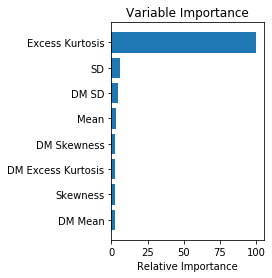

In [48]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [49]:
print(clf.score(xt,ytest))
cross_val_score(clf, xtr,ytrain, cv=10).mean()

0.9755586592178771


0.9790442823105616

In [43]:
#xgboost
import xgboost as xgb
xgclass = xgb.XGBClassifier()
xgclass.fit(xtr,ytrain)
print(xgclass.score(xt,ytest))
cross_val_score(xgclass, xtr,ytrain, cv=10).mean()

0.9762569832402235


0.980347735163315

In [50]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

xre, yre = SMOTE().fit_resample(xtr, ytrain)
xre=pd.DataFrame(xre, columns=["Mean","SD","Excess Kurtosis","Skewness","DM Mean","DM SD", "DM Excess Kurtosis","DM Skewness"])


bnb.fit(xre,yre)
print(bnb.score(xt,ytest))
logreg.fit(xre,yre)
print(logreg.score(xt,ytest))
neighbors.fit(xre,yre)
print(neighbors.score(xt,ytest))
rfc.fit(xre,yre)
print(rfc.score(xt,ytest))
svc.fit(xre,yre)
print(svc.score(xt,ytest))
clf.fit(xtr, ytrain)
print(clf.score(xt,ytest))
xgclass.fit(xre,yre)
print(xgclass.score(xt,ytest))


0.8449720670391061
0.9346368715083799
0.9526536312849162
0.9692737430167597
0.9506983240223463
0.9748603351955307
0.9589385474860335


In [52]:
print(cross_val_score(bnb, xre,yre, cv=10).mean())
print(cross_val_score(logreg, xre,yre, cv=10).mean())
print(cross_val_score(neighbors, xre,yre, cv=10).mean())
print(cross_val_score(rfc, xre,yre, cv=10).mean())
print(cross_val_score(svc, xre,yre, cv=10).mean())
print(cross_val_score(clf, xre,yre, cv=10).mean())
print(cross_val_score(xgclass, xre,yre, cv=10).mean())

0.8886305363165341
0.9335601055397742
0.969255689253455
0.9785917568329555
0.9407813879757002
0.9769417403423659
0.9512533912099839


In [53]:
#Code for classification_report 
from sklearn.metrics import classification_report

bpred = bnb.predict(xt)
print(classification_report(ytest,bpred))
lpred = logreg.predict(xt)
print(classification_report(ytest,lpred))
kpred = neighbors.predict(xt)
print(classification_report(ytest,kpred))
rpred = rfc.predict(xt)
print(classification_report(ytest,rpred))
svpred = svc.predict(xt)
print(classification_report(ytest,svpred))
cpred = clf.predict(xt)
print(classification_report(ytest,cpred))
xgpred = logreg.predict(xt)
print(classification_report(ytest,xgpred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6566
           1       0.34      0.93      0.50       594

    accuracy                           0.84      7160
   macro avg       0.67      0.88      0.70      7160
weighted avg       0.94      0.84      0.87      7160

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      6566
           1       0.56      0.92      0.70       594

    accuracy                           0.93      7160
   macro avg       0.78      0.93      0.83      7160
weighted avg       0.96      0.93      0.94      7160

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      6566
           1       0.66      0.90      0.76       594

    accuracy                           0.95      7160
   macro avg       0.82      0.93      0.87      7160
weighted avg       0.96      0.95      0.96      7160

              preci

To add:

-Check for outliers (winsorize) and then scale (log, normalize, minmax)
-Judging from histograms, need to box-cox transform for regression models

-Run the KNN, Forest, and SVM with base dataset

-Data leakage: scale training and test set seperately

Pt 2:
-Classification report over simple accuracy measures: F1 scores and confusion matrix
-Ensemble: Stacking ensemble, bagging 

-Try to balance classes? Oversample, Undersample

